In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('lebron_career.csv')
df.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,plus_minus
0,1,2003-10-29,18-303,CLE,SAC,L (-14),42,12,20,0.600,...,2,4,6,9,4,0,2,25,24.7,-9
1,2,2003-10-30,18-304,CLE,PHO,L (-9),41,8,17,0.471,...,2,10,12,8,1,0,7,21,14.7,-3
2,3,2003-11-01,18-306,CLE,POR,L (-19),39,3,12,0.250,...,0,4,4,6,2,0,2,8,5.0,-21
3,4,2003-11-05,18-310,CLE,DEN,L (-4),41,3,11,0.273,...,2,9,11,7,2,3,2,7,11.2,-3
4,5,2003-11-07,18-312,CLE,IND,L (-1),44,8,18,0.444,...,0,5,5,3,0,0,7,23,9.0,-7


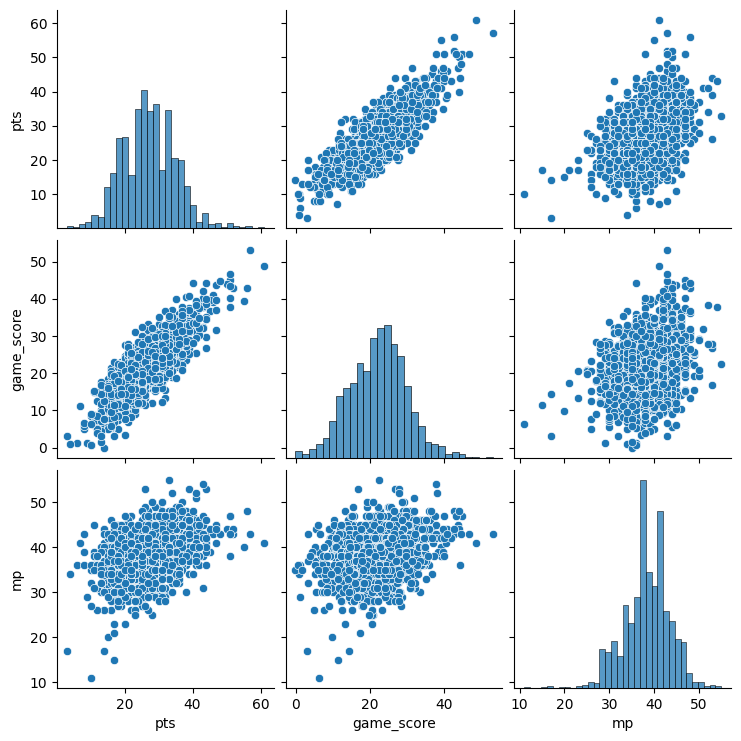

In [3]:
#Plot Age, Income and Spending Score Correlation
sns.pairplot(df[['pts','game_score', 'mp']])

In [4]:
# Creating clusters
kmeans = cluster.KMeans(n_clusters=4)
kmeans = kmeans.fit(df[['pts','mp']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
kmeans.cluster_centers_

array([[18.41558442, 33.08441558],
       [23.92054795, 41.11780822],
       [37.98290598, 43.39316239],
       [30.58659218, 36.92178771]])

In [6]:
df['Clusters'] = kmeans.labels_
df.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,drb,trb,ast,stl,blk,tov,pts,game_score,plus_minus,Clusters
0,1,2003-10-29,18-303,CLE,SAC,L (-14),42,12,20,0.600,...,4,6,9,4,0,2,25,24.7,-9,1
1,2,2003-10-30,18-304,CLE,PHO,L (-9),41,8,17,0.471,...,10,12,8,1,0,7,21,14.7,-3,1
2,3,2003-11-01,18-306,CLE,POR,L (-19),39,3,12,0.250,...,4,4,6,2,0,2,8,5.0,-21,0
3,4,2003-11-05,18-310,CLE,DEN,L (-4),41,3,11,0.273,...,9,11,7,2,3,2,7,11.2,-3,0
4,5,2003-11-07,18-312,CLE,IND,L (-1),44,8,18,0.444,...,5,5,3,0,0,7,23,9.0,-7,1


In [7]:
df['Clusters'].value_counts()

Clusters
1    363
3    360
0    308
2    234
Name: count, dtype: int64

<Axes: xlabel='mp', ylabel='pts'>

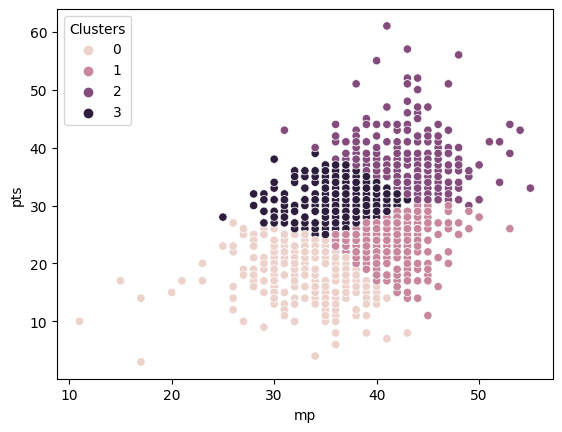

In [8]:
sns.scatterplot(x="mp", y="pts",hue = 'Clusters',  data=df)

In [9]:
silhouette_avg = silhouette_score(df[['pts','game_score']], df['Clusters'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.1122902808753828


In [10]:
# Creating clusters
kmeans = cluster.KMeans(n_clusters=2)
kmeans = kmeans.fit(df[['pts','mp']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
kmeans.cluster_centers_

array([[33.20063694, 40.77229299],
       [21.02197802, 36.05180534]])

In [12]:
df['Clusters'] = kmeans.labels_
df.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,drb,trb,ast,stl,blk,tov,pts,game_score,plus_minus,Clusters
0,1,2003-10-29,18-303,CLE,SAC,L (-14),42,12,20,0.600,...,4,6,9,4,0,2,25,24.7,-9,1
1,2,2003-10-30,18-304,CLE,PHO,L (-9),41,8,17,0.471,...,10,12,8,1,0,7,21,14.7,-3,1
2,3,2003-11-01,18-306,CLE,POR,L (-19),39,3,12,0.250,...,4,4,6,2,0,2,8,5.0,-21,1
3,4,2003-11-05,18-310,CLE,DEN,L (-4),41,3,11,0.273,...,9,11,7,2,3,2,7,11.2,-3,1
4,5,2003-11-07,18-312,CLE,IND,L (-1),44,8,18,0.444,...,5,5,3,0,0,7,23,9.0,-7,1


<Axes: xlabel='mp', ylabel='pts'>

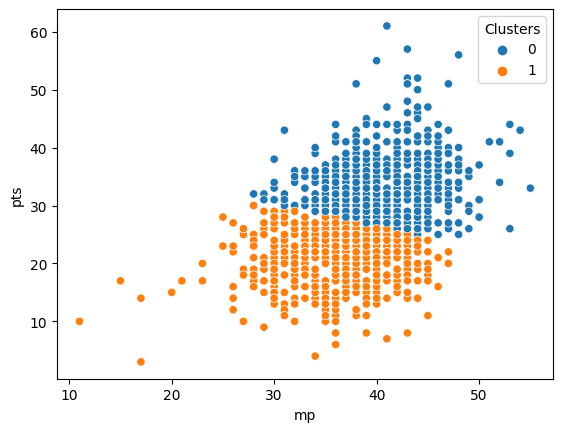

In [13]:
sns.scatterplot(x="mp", y="pts",hue = 'Clusters',  data=df)

In [15]:
silhouette_avg = silhouette_score(df[['pts','pts']], df['Clusters'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5199519084870629


In [24]:
# copy the data 
df_min_max_scaled = df[['mp', 'fg', 'fga','fgp', 'three', 'threeatt', 'threep', 'ft', 'fta', 'ftp', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'plus_minus']].copy() 

In [25]:
df_min_max_scaled.columns

Index(['mp', 'fg', 'fga', 'fgp', 'three', 'threeatt', 'threep', 'ft', 'fta',
       'ftp', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pts',
       'game_score', 'plus_minus'],
      dtype='object')

In [26]:
# apply normalization techniques 
for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     
  
# view normalized data 
print(df_min_max_scaled)

            mp        fg       fga       fgp  three  threeatt  threep   
0     0.704545  0.521739  0.483871  0.645856  0.000  0.153846   0.000  \
1     0.681818  0.347826  0.387097  0.506997  0.125  0.384615   0.200   
2     0.636364  0.130435  0.225806  0.269107  0.000  0.076923   0.000   
3     0.681818  0.130435  0.193548  0.293864  0.000  0.153846   0.000   
4     0.750000  0.347826  0.419355  0.477933  0.125  0.153846   0.500   
...        ...       ...       ...       ...    ...       ...     ...   
1260  0.545455  0.391304  0.354839  0.606028  0.250  0.384615   0.400   
1261  0.431818  0.304348  0.451613  0.396125  0.000  0.384615   0.000   
1262  0.545455  0.565217  0.612903  0.583423  0.250  0.461538   0.333   
1263  0.613636  0.391304  0.516129  0.461787  0.625  0.846154   0.455   
1264  0.090909  0.260870  0.258065  0.497309  0.250  0.384615   0.400   

            ft       fta    ftp       orb       drb       trb       ast   
0     0.041667  0.107143  0.333  0.285714  0.235

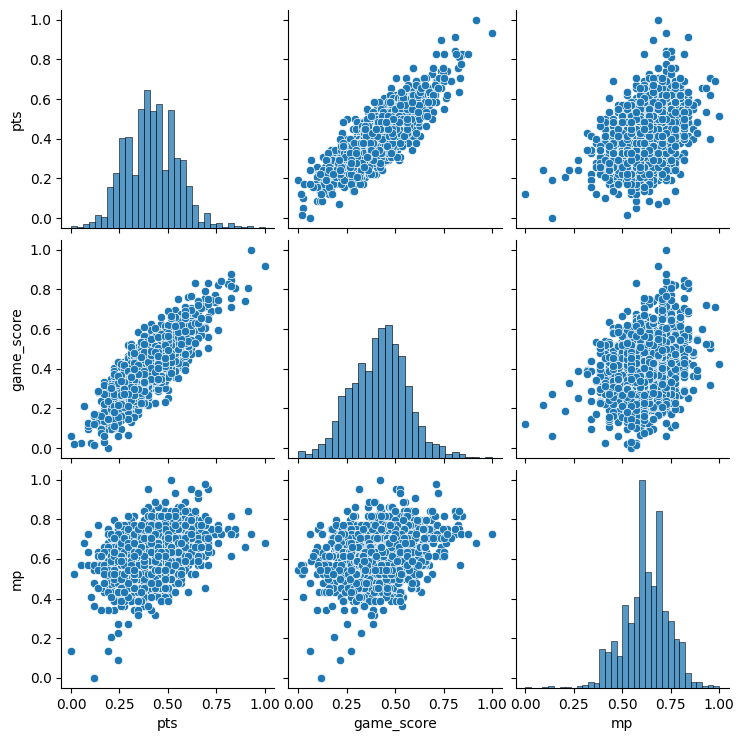

In [27]:
#Plot Age, Income and Spending Score Correlation
sns.pairplot(df_min_max_scaled[['pts','game_score', 'mp']])

In [28]:
# Creating clusters
kmeans = cluster.KMeans(n_clusters=4)
kmeans = kmeans.fit(df_min_max_scaled[['pts','mp']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
df_min_max_scaled['Clusters'] = kmeans.labels_
df_min_max_scaled.head()

,mp,fg,fga,fgp,three,threeatt,threep,ft,fta,ftp,...,drb,trb,ast,stl,blk,tov,pts,game_score,plus_minus,Clusters
0,0.704545,0.521739,0.483871,0.645856,0.000,0.153846,0.0,0.041667,0.107143,0.333,...,0.235294,0.315789,0.473684,0.571429,0.0,0.181818,0.379310,0.465291,0.384615,3
1,0.681818,0.347826,0.387097,0.506997,0.125,0.384615,0.2,0.166667,0.250000,0.571,...,0.588235,0.631579,0.421053,0.142857,0.0,0.636364,0.310345,0.277674,0.461538,3
2,0.636364,0.130435,0.225806,0.269107,0.000,0.076923,0.0,0.083333,0.071429,1.000,...,0.235294,0.210526,0.315789,0.285714,0.0,0.181818,0.086207,0.095685,0.230769,0
3,0.681818,0.130435,0.193548,0.293864,0.000,0.153846,0.0,0.041667,0.035714,1.000,...,0.529412,0.578947,0.368421,0.285714,0.6,0.181818,0.068966,0.212008,0.461538,0
4,0.750000,0.347826,0.419355,0.477933,0.125,0.153846,0.5,0.250000,0.250000,0.857,...,0.294118,0.263158,0.157895,0.000000,0.0,0.636364,0.344828,0.170732,0.410256,3


<Axes: xlabel='mp', ylabel='pts'>

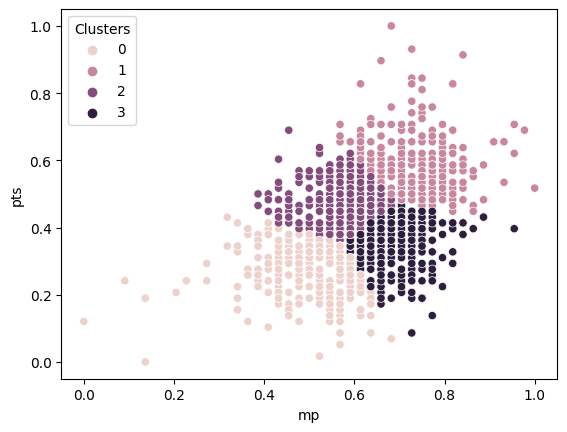

In [30]:
sns.scatterplot(x="mp", y="pts",hue = 'Clusters',  data=df_min_max_scaled)

In [31]:
silhouette_avg = silhouette_score(df_min_max_scaled[['pts','pts']], df_min_max_scaled['Clusters'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.1206918676408294


In [32]:
# Creating clusters
kmeans = cluster.KMeans(n_clusters=2)
kmeans = kmeans.fit(df_min_max_scaled[['pts','mp']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
df_min_max_scaled['Clusters'] = kmeans.labels_
df_min_max_scaled.head()

,mp,fg,fga,fgp,three,threeatt,threep,ft,fta,ftp,...,drb,trb,ast,stl,blk,tov,pts,game_score,plus_minus,Clusters
0,0.704545,0.521739,0.483871,0.645856,0.000,0.153846,0.0,0.041667,0.107143,0.333,...,0.235294,0.315789,0.473684,0.571429,0.0,0.181818,0.379310,0.465291,0.384615,1
1,0.681818,0.347826,0.387097,0.506997,0.125,0.384615,0.2,0.166667,0.250000,0.571,...,0.588235,0.631579,0.421053,0.142857,0.0,0.636364,0.310345,0.277674,0.461538,0
2,0.636364,0.130435,0.225806,0.269107,0.000,0.076923,0.0,0.083333,0.071429,1.000,...,0.235294,0.210526,0.315789,0.285714,0.0,0.181818,0.086207,0.095685,0.230769,0
3,0.681818,0.130435,0.193548,0.293864,0.000,0.153846,0.0,0.041667,0.035714,1.000,...,0.529412,0.578947,0.368421,0.285714,0.6,0.181818,0.068966,0.212008,0.461538,0
4,0.750000,0.347826,0.419355,0.477933,0.125,0.153846,0.5,0.250000,0.250000,0.857,...,0.294118,0.263158,0.157895,0.000000,0.0,0.636364,0.344828,0.170732,0.410256,1


<Axes: xlabel='mp', ylabel='pts'>

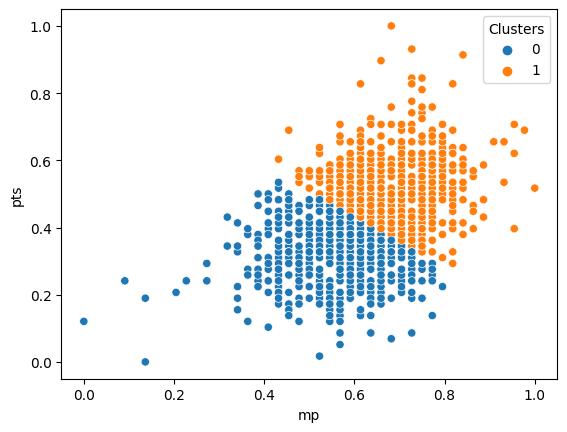

In [34]:
sns.scatterplot(x="mp", y="pts",hue = 'Clusters',  data=df_min_max_scaled)

In [35]:
silhouette_avg = silhouette_score(df_min_max_scaled[['pts','pts']], df_min_max_scaled['Clusters'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.41657829480870906
